<a href="https://colab.research.google.com/github/tigju/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/LS_DS_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

In [0]:
# imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# PCA module from sklearn
from sklearn.decomposition import PCA

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

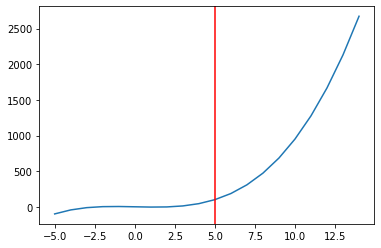

In [2]:
# graph that passes the vertical line test
a = np.arange(-5, 15)
b = a**3 - 5*a

plt.plot(a,b);
plt.axvline(x=5,color='r')
plt.show()

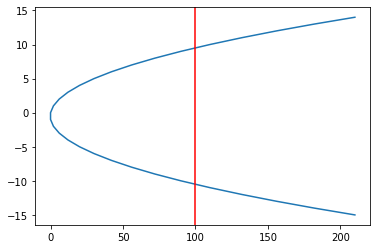

In [3]:
# graph that doesn't pass the vertical line test
c = np.arange(-15,15)
d = c**2+c

plt.plot(d,c)
plt.axvline(x=100, color='r')
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because the function is the relation between inputs and outputs and each input has to be mapped to one output. One input can't be mapped to multiple outputs. If vertical line intersects the graph more then one time, graph doesn't represent a function, it should be only one output value for each input value.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

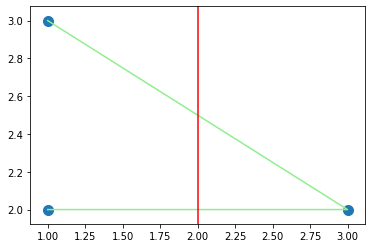

In [4]:
# Relation 1 (does not pass vertical line test)
x_1 = np.array([1,3,1])
y_1 = np.array([2,2,3])

plt.scatter(x_1,y_1, s=100)
plt.plot(x_1,y_1, color='lightgreen')
plt.axvline(x=2,color='r')

plt.show()

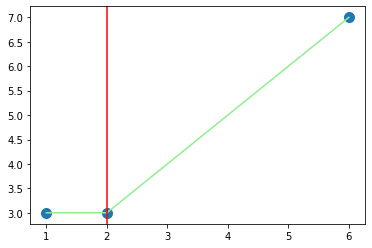

In [5]:
# Relation 2
x_2 = np.array([1,2,6])
y_2 = np.array([3,3,7])

plt.scatter(x_2,y_2, s=100)
plt.plot(x_2,y_2, color='lightgreen')
plt.axvline(x=2,color='r')

plt.show()

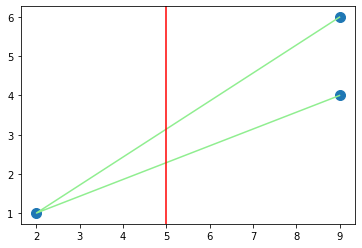

In [8]:
# Relation 3 (does not pass vertical line test)
x_3 = np.array([9,2,9])
y_3 = np.array([4,1,6])

plt.scatter(x_3,y_3, s=100)
plt.plot(x_3,y_3, color='lightgreen')
plt.axvline(x=5,color='r')

plt.show()

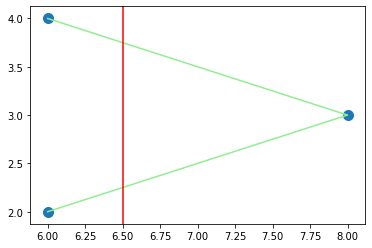

In [9]:
# Relation 4 (does not pass vertical line test)
x_4 = np.array([6,8,6])
y_4 = np.array([2,3,4])

plt.scatter(x_4,y_4, s=100)
plt.plot(x_4,y_4, color='lightgreen')
plt.axvline(x=6.5,color='r')

plt.show()

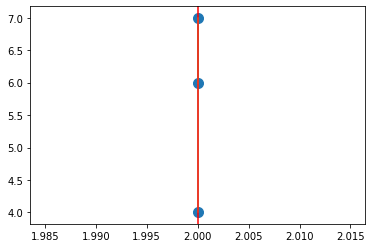

In [10]:
# Relation 5 (does not pass vertical line test)
x_5 = np.array([2,2,2])
y_5 = np.array([6,7,4])

plt.scatter(x_5,y_5, s=100)
plt.plot(x_5,y_5, color='lightgreen')
plt.axvline(x=2,color='r')

plt.show()

**Relation 2** meets the definition of a function, because it has the unique range/output values for each domain/input value. Also it passes V-L test.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

##\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

For **m** function dimentionality of domain (input) is 3 and range (output) is 3 as well

For **n** function dimentionality of domain (input) is 4 and range (output) is 2.

In [0]:
# plot the function m(x1,x2,x3) = (x1 + x2, x1 + x3, x2 + x3)

def m(inpt):
  '''
  input is a tuple with 3 elements
  outputt is a tuple with 3 elements
  '''
  return (inpt[0] + inpt[1], inpt[0] + inpt[2], inpt[1] + inpt[2])

[8, 10, 13] [4, 6, 8] [6, 8, 11]


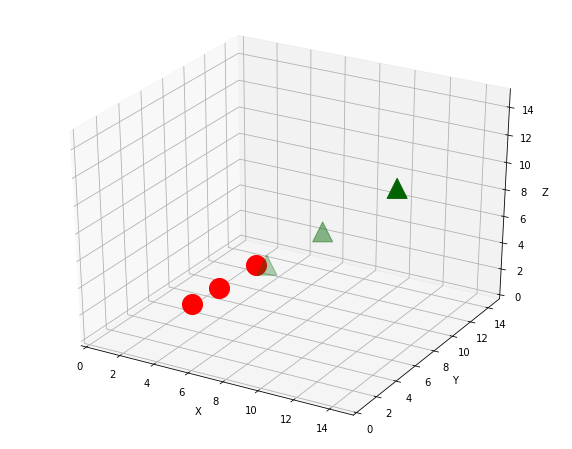

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')


ax.set_xlim([0, 15])
ax.set_ylim([0, 15])
ax.set_zlim([0, 15])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


x = []
y = []
z = []

for point in [(3,5,1),(4,6,2),(5,8,3)]:
  ax.scatter(point[0], point[1], point[2], s=20**2, color='r', marker='o', depthshade=True)
  x.append(m(point)[0])
  y.append(m(point)[1])
  z.append(m(point)[2])

print(x,y,z)
ax.scatter(x,y,z, s=20**2, color='darkgreen', marker='^')
plt.show()


## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Functions can be mapped from high-dimentional space to low-dimentional space and vice versa.

\begin{align}
m(𝑥_1,𝑥_2)=(x_1+x_2, x_1 + 3, 2x_2)
\end{align}


# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [0]:
def p(vect):
    x1=vect[0][0]
    x2=vect[1][0]
    row1 = np.array([x1 + 3*x2])
    row2 = np.array([2*x2 - x1])
    output_vector=np.array([row1, row2])
    return output_vector

In [14]:
i_hat=np.array([[1],[0]])
a=p(i_hat)
a

array([[ 1],
       [-1]])

In [15]:
j_hat=np.array([[0],[1]])
b=p(j_hat)
b

array([[3],
       [2]])

In [16]:
# combine 2 arrays into matrix
M = np.column_stack([a,b])
M

array([[ 1,  3],
       [-1,  2]])

In [0]:
def q(vect):
    x1=vect[0][0]
    x2=vect[1][0]
    x3=vect[2][0]
    row1 = np.array([4*x1 + x2 + 2*x3])
    row2 = np.array([2*x2 - x1 + 3*x3])
    row3 = np.array([5*x1 - 2*x3 + x2])
    output_vector=np.array([row1, row2, row3])
    return output_vector

In [18]:
i_h=np.array([[1],[0],[0]])
x=q(i_h)
x

array([[ 4],
       [-1],
       [ 5]])

In [19]:
j_h=np.array([[0],[1],[0]])
y=q(j_h)
y

array([[1],
       [2],
       [1]])

In [20]:
k_h=np.array([[0],[0],[1]])
z=q(k_h)
z

array([[ 2],
       [ 3],
       [-2]])

In [21]:
# combine 3 arrays into matrix
M_2 = np.column_stack([x,y,z])
M_2

array([[ 4,  1,  2],
       [-1,  2,  3],
       [ 5,  1, -2]])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [22]:
input_matrix = np.array([[2],[3]])
p(input_matrix)

array([[11],
       [ 4]])

In [23]:
output_vector = np.matmul(M, input_matrix)
output_vector

array([[11],
       [ 4]])

In [24]:
input_matx = np.array([[2],[3],[4]])
q(input_matx)

array([[19],
       [16],
       [ 5]])

In [25]:
output_vect = np.matmul(M_2, input_matx) 
output_vect

array([[19],
       [16],
       [ 5]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

**Eigenvector** is a vector that remains on it's own span after transformation and **eigenvalue** is the factor by which that vector is stretched or squished.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

The higher the number of dimentions/features is, data becomes very sparse, therefore efficiency will be very low when searching, exploring, organizing, optimazing, and visualising the data.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

The rule of thumb depends on a model, however the good practice is to have 5 times the number of observations as you have parameters in your model.

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [26]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [27]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [28]:
# check for null values
national.isnull().sum().any()

False

In [29]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [30]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [31]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [32]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

In [55]:
from sklearn.preprocessing import StandardScaler
feature_cols=national_processed.columns[1:]
feature_cols[:20]

Index(['AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50', 'L80', 'IPOV',
       'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY', 'TENURE',
       'NUNITS', 'ROOMS', 'WEIGHT', 'PER'],
      dtype='object')

In [0]:
scaler = StandardScaler()

In [0]:
national_processed = scaler.fit_transform(national_processed)

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca_national = PCA(n_components=3)
pca_data = pca_national.fit_transform(national_processed)

In [90]:
pca_national.explained_variance_ratio_

array([0.34050542, 0.14442164, 0.10287616])

In [91]:
pca_national.explained_variance_ratio_

array([0.34050542, 0.14442164, 0.10287616])

In [92]:
sum(pca_national.explained_variance_ratio_)

0.5878032147253328

In [93]:
1-sum(pca_national.explained_variance_ratio_)

0.4121967852746672

In [95]:
df_final = pd.DataFrame(data = pca_data, columns = ['comp_1', 'comp_2', 'comp_3'])
df_final.head()

,comp_1,comp_2,comp_3
0,-2.576570,-1.376127,-1.253834
1,2.040643,-0.988061,-2.238000
2,1.215270,0.370168,-3.248607
3,2.821837,1.723711,-4.375157
4,-1.570106,-0.878362,-3.307062


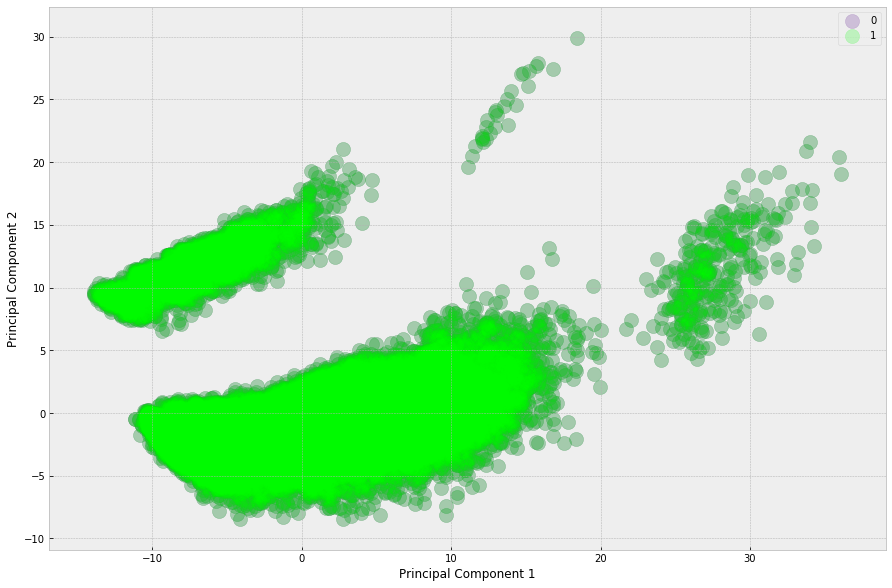

In [102]:
plt.figure(figsize=(15,10))
plt.style.use('bmh')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for k, c in [(0, 'indigo'), (1, 'lime')]:  
    plt.scatter(x=df_final['comp_1'], 
                y=df_final['comp_2'], 
                s=200,
                alpha=.2,
                color=c,
                label=k);
plt.legend();

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)